In [1]:
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, TargetEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r'./winemag-data.csv')

data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
data = data.drop(columns=['Unnamed: 0', 'description', 'points'])

print(f"Shape before dropping NaN's: {data.shape}")

data = data.dropna(how='any')

print(f"Shape after dropping NaN's: {data.shape}")

Shape before dropping NaN's: (150930, 8)
Shape after dropping NaN's: (39241, 8)


In [5]:
y = data['price']
X = data.drop(columns=['price'])

print(f"{X.shape=}\t\t{y.shape=}")

X.head()

X.shape=(39241, 7)		y.shape=(39241,)


,country,designation,province,region_1,region_2,variety,winery
0,US,Martha's Vineyard,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,US,Special Selected Late Harvest,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,Reserve,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,US,Silice,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,Gap's Crown Vineyard,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

X_train.shape, X_val.shape

((29430, 7), (9811, 7))

In [7]:
catboost = CatBoostRegressor(num_trees=250, depth=3, silent=True, cat_features=list(X_train.columns))
catboost.fit(X_train, y_train)

print(f"Catboost regression R^2 score: {catboost.score(X_val, y_val)}")

Catboost regression R^2 score: 0.616427681461183


In [8]:
y_preds = catboost.predict(X_val)
y_act = y_val.copy()

print(f"{y_preds.shape=}\t{y_act.shape=}")

y_preds.shape=(9811,)	y_act.shape=(9811,)


In [9]:
sns.kdeplot

<function seaborn.distributions.kdeplot(data=None, *, x=None, y=None, hue=None, weights=None, palette=None, hue_order=None, hue_norm=None, color=None, fill=None, multiple='layer', common_norm=True, common_grid=False, cumulative=False, bw_method='scott', bw_adjust=1, warn_singular=True, log_scale=None, levels=10, thresh=0.05, gridsize=200, cut=3, clip=None, legend=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)>

In [10]:
from validation.src import Validation

In [11]:
val = Validation(y_pred=y_preds, y_act=y_act, kde_eval='fast')

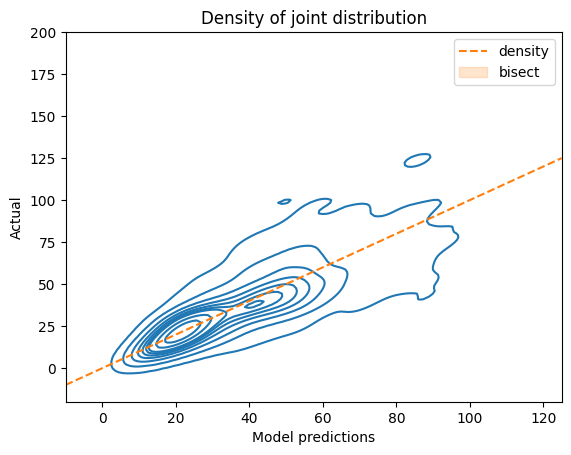

In [12]:
val.plot_joint(x_lims=[-10, 125], y_lims=[-20, 200])

c:\Users\Vladimir\Downloads\ABBA\validation\src.py:269: UserWarning: pdf_sp is equal to zero
  warnings.warn('pdf_sp is equal to zero')


(0.0, 150.0)

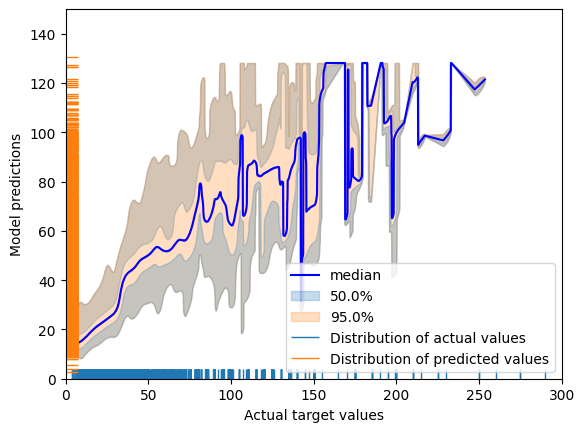

In [13]:
_, ax = plt.subplots()

val.plot_recall_curve(ax=ax)

ax.set_xlim(0, 300)
ax.set_ylim(0, 150)

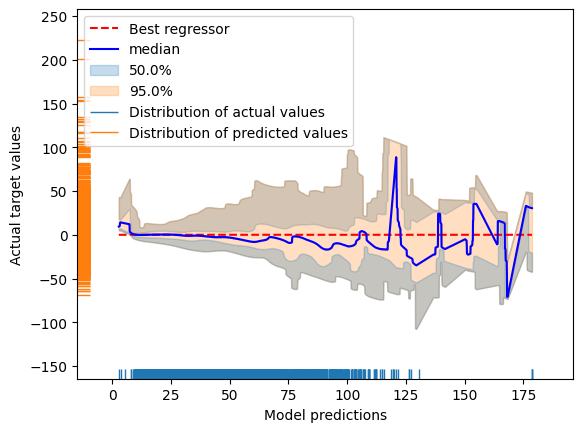

In [21]:
_, ax = plt.subplots()

val.plot_precision_curve(ax=ax, plot_optimal=True, plot_mode='deviation')

# ax.set_xlim(0, 150)
# ax.set_ylim(0, 300)

In [22]:
print(f"RMSE score: {val.rmse_score()}")
print(f"MAE score: {val.mae_score()}")
print(f"R2 score: {val.r2_score()}")

RMSE score: 14.72350298618441
MAE score: 8.76295509650523
R2 score: 0.616427681461183
